# Анализ информации сервиса вопросов и ответов о программировании

## Схема данных

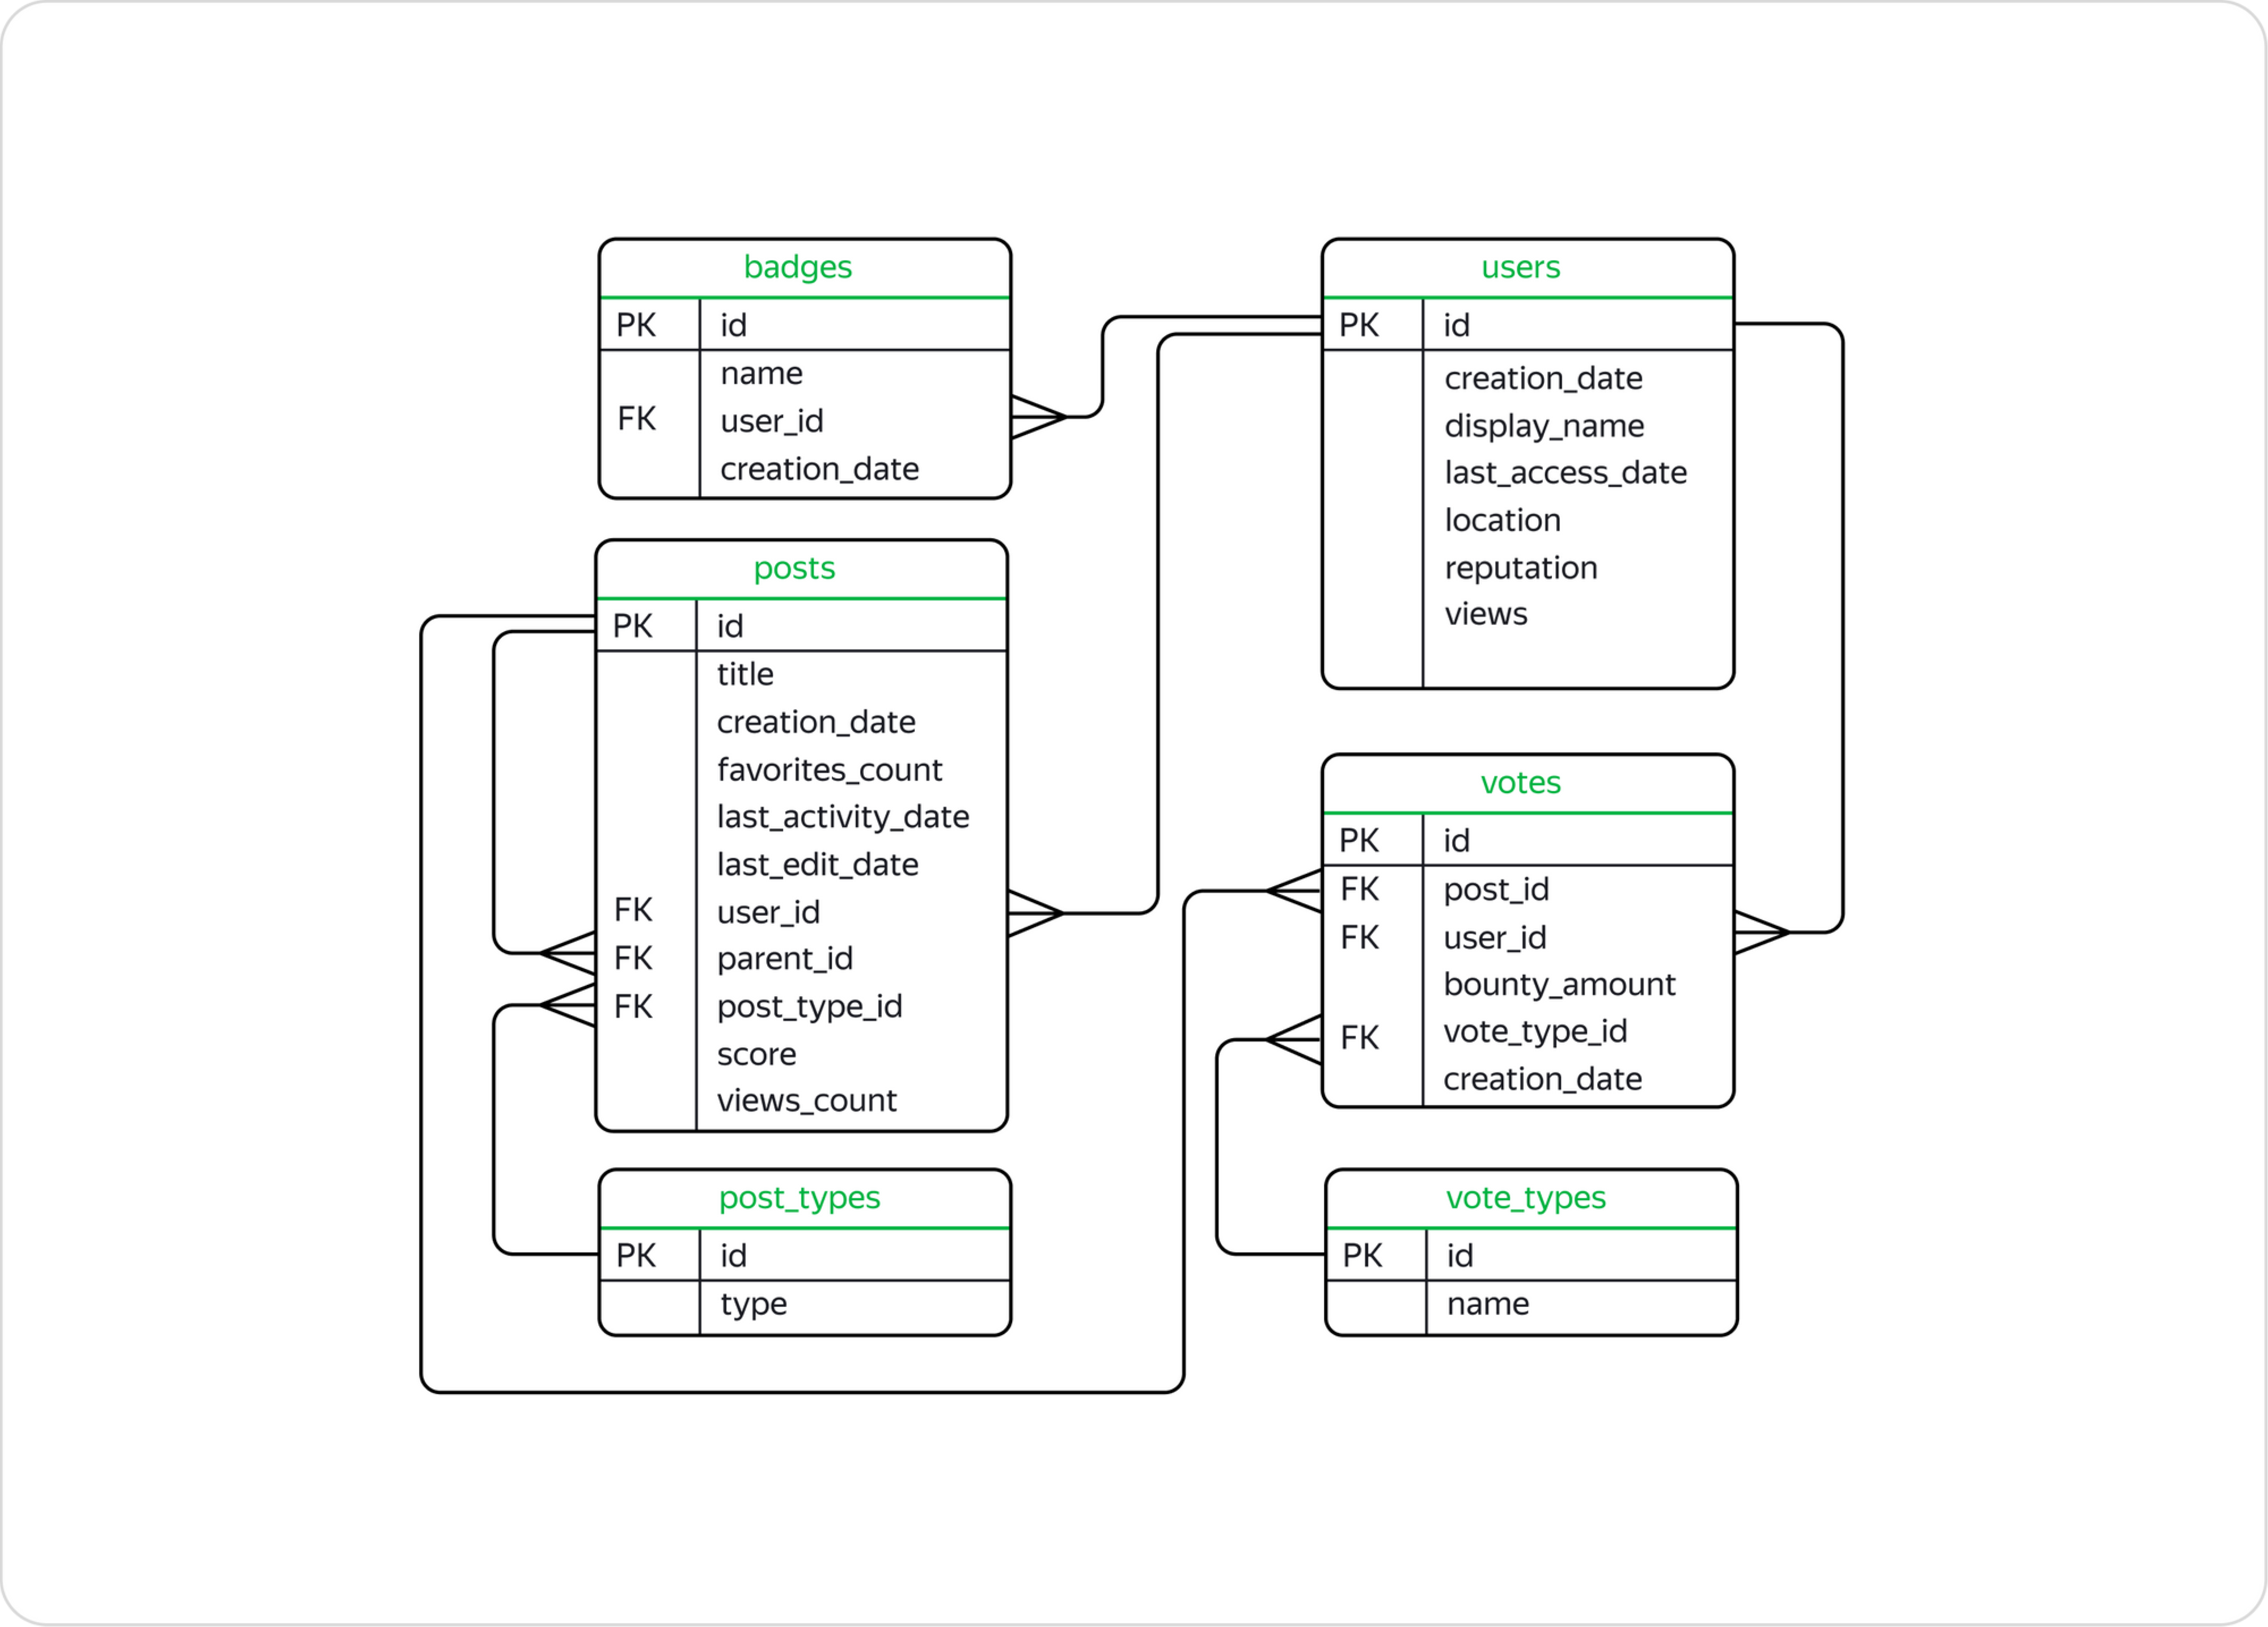

## Описание данных 

Таблица `stackoverflow.badges` хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql:
- `id` - **идентификатор значка, первичный ключ таблицы**
- `name` - **название значка**
- `user_id` -	**идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице `users`**
- `creation_date` -	**дата присвоения значка**
___
Таблица `stackoverflow.post_types` содержит информацию о типе постов.
- Их может быть два:
   - `Question` - **пост с вопросом**
   - `Answer` - **пост с ответом**
- `id` - **идентификатор поста, первичный ключ таблицы**
- `type` - **тип поста**
___
Таблица `stackoverflow.posts` содержит информацию о постах:
- `id` - **идентификатор поста, первичный ключ таблицы**
- `title` - **заголовок поста**
- `creation_date` - **дата создания поста**
- `favorites_count` - **число, которое показывает, сколько раз пост добавили в «Закладки»**
- `last_activity_date` - **дата последнего действия в посте, например комментария**
- `last_edit_date` - **дата последнего изменения поста**
- `user_id` - **идентификатор пользователя, который создал пост, внешний ключ к таблице `users`**
- `parent_id` -	**если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом**
- `post_type_id` - **идентификатор типа поста, внешний ключ к таблице `post_types`**
- `score` - **количество очков, которое набрал пост**
- `views_count` - **количество просмотров**
___
Таблица `stackoverflow.users` содержит информацию о пользователях:
- `id` - **идентификатор пользователя, первичный ключ таблицы**
- `creation_date` - **дата регистрации пользователя**
- `display_name` - **имя пользователя**
- `last_access_date` - **дата последнего входа**
- `location` - **местоположение**
- `reputation` - **очки репутации, которые получают за хорошие вопросы и полезные ответы**
- `views` -	**число просмотров профиля пользователя**
___
Таблица `stackoverflow.vote_types` содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту.
- Типов бывает несколько:
   - `UpMod` - **такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными**
   - `DownMod` - **такую отметку получают посты, которые показались пользователям наименее полезными**
   - `Close` - **такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы**
   - `Offensive` - **такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста**
   - `Spam` - **такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой**
- `id` - **идентификатор типа голоса, первичный ключ**
- `name` - **название метки**
___
Таблица `stackoverflow.votes` содержит информацию о голосах за посты: 
- `id` - **идентификатор голоса, первичный ключ**
- `post_id` - **идентификатор поста, внешний ключ к таблице `posts`**
- `user_id`	- **идентификатор пользователя, который поставил посту голос, внешний ключ к таблице `users`**
- `bounty_amount`	- **сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту**
- `vote_type_id` - **идентификатор типа голоса, внешний ключ к таблице `vote_types`**
- `creation_date` - **дата назначения голоса**

# Работа с проектом

## Задание 1

Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки»

In [ ]:
'''
SELECT COUNT(id)
FROM stackoverflow.posts -- добавьте название таблицы и условие
WHERE post_type_id = 1 AND (score > 300 OR favorites_count >= 100)
GROUP BY post_type_id;
'''

## Задание 2

Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа

In [ ]:
'''
SELECT ROUND(AVG(q.count), 0)
FROM (
      SELECT COUNT(id),
             creation_date::date
      FROM stackoverflow.posts
      WHERE post_type_id = 1
      GROUP BY creation_date::date
      HAVING creation_date::date BETWEEN '2008-11-01' AND '2008-11-18') AS q;
'''

## Задание 3

Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей

In [ ]:
'''
SELECT COUNT(DISTINCT b.user_id)
FROM stackoverflow.badges AS b
JOIN stackoverflow.users AS u ON u.id=b.user_id
WHERE u.creation_date::date = b.creation_date::date
'''

## Задание 4

Сколько уникальных постов пользователя с именем `Joel Coehoorn` получили хотя бы один голос?

In [ ]:
'''
SELECT COUNT(cv.id)
FROM (SELECT ps.id
      FROM stackoverflow.posts AS ps
      JOIN stackoverflow.votes AS v ON ps.id=v.post_id
      JOIN stackoverflow.users AS u ON ps.user_id=u.id
      WHERE u.display_name LIKE 'Joel Coehoorn' AND v.id > 0
      GROUP BY ps.id) AS cv;
'''

## Задание 5

Выгрузите все поля таблицы `vote_types`. Добавьте к таблице поле `rank`, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю `id`

In [ ]:
'''
SELECT *,
       ROW_NUMBER() OVER(ORDER BY id DESC) AS rank
FROM stackoverflow.vote_types
ORDER BY id;
'''

## Задание 6

Отберите 10 пользователей, которые поставили больше всего голосов типа `Close`. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя

In [ ]:
'''
SELECT *
FROM (SELECT v.user_id,
             COUNT(vt.id) AS v_cnt
      FROM stackoverflow.votes AS v
      JOIN stackoverflow.vote_types AS vt ON vt.id=v.vote_type_id
      WHERE vt.name LIKE 'Close'
      GROUP BY v.user_id
      ORDER BY v_cnt DESC
      LIMIT 10) AS au
ORDER BY au.v_cnt DESC, au.user_id DESC;
'''

## Задание 7

Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.
Отобразите несколько полей:
- идентификатор пользователя;
- число значков;
- место в рейтинге — чем больше значков, тем выше рейтинг.

Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.
Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя

In [ ]:
'''
SELECT *,
      DENSE_RANK() OVER (ORDER BY b.b_cnt DESC) AS rating
FROM (SELECT user_id,
             COUNT(id) AS b_cnt
      FROM stackoverflow.badges
      WHERE creation_date::date BETWEEN '2008-11-15' AND '2008-12-15' 
      GROUP BY user_id
      ORDER BY b_cnt DESC, user_id LIMIT 10) as b;
'''

## Задание 8

Сколько в среднем очков получает пост каждого пользователя?

Сформируйте таблицу из следующих полей:
- заголовок поста;
- идентификатор пользователя;
- число очков поста;
- среднее число очков пользователя за пост, округлённое до целого числа.

Не учитывайте посты без заголовка, а также те, что набрали ноль очков

In [ ]:
'''
WITH sc AS (
SELECT ROUND(AVG(score)) AS avg_score,
       user_id
FROM stackoverflow.posts
WHERE title IS NOT NULL AND score <> 0
GROUP BY user_id)

SELECT p.title,
       sc.user_id,
       p.score,
       sc.avg_score
FROM sc
JOIN stackoverflow.posts AS p ON sc.user_id=p.user_id
WHERE p.title IS NOT NULL AND p.score <> 0;
'''

## Задание 9

Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список

In [ ]:
'''
SELECT title
FROM stackoverflow.posts
WHERE user_id IN (SELECT user_id
                  FROM stackoverflow.badges
                  GROUP BY user_id
                  HAVING COUNT(id) >1000)
              AND title IS NOT NULL;
'''

## Задание 10

Напишите запрос, который выгрузит данные о пользователях из США (англ. United States). Разделите пользователей на три группы в зависимости от количества просмотров их профилей:
- пользователям с числом просмотров больше либо равным 350 присвойте группу `1`;
- пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу `2`;
- пользователям с числом просмотров меньше 100 — группу `3`.

Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с нулевым количеством просмотров не должны войти в итоговую таблицу

In [ ]:
'''
SELECT id,
       views,
       CASE
          WHEN views >= 350 THEN 1
          WHEN views < 100 THEN 3
          ELSE 2
       END AS group
FROM stackoverflow.users
WHERE location LIKE '%United States%' AND views > 0;
'''

## Задание 11

Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора

In [ ]:
'''
WITH grp AS (SELECT g.id,
                    g.views,
                    g.group,
                    MAX(g.views) OVER (PARTITION BY g.group) AS max     
             FROM (SELECT id,
                          views,
                          CASE
                             WHEN views >= 350 THEN 1
                             WHEN views < 100 THEN 3
                             ELSE 2
                          END AS group
                   FROM stackoverflow.users
                   WHERE location LIKE '%United States%' AND views > 0) as g
              )
  
SELECT grp.id, 
       grp.views,  
       grp.group
FROM grp
WHERE grp.views = grp.max
ORDER BY grp.views DESC, grp.id;
'''

## Задание 12

Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:
- номер дня;
- число пользователей, зарегистрированных в этот день;
- сумму пользователей с накоплением

In [ ]:
'''
SELECT *,
       SUM(uc.cnt_reg) OVER (ORDER BY uc.days) as cnt_users
FROM (SELECT EXTRACT(DAY FROM creation_date::date) AS days,
             COUNT(id) AS cnt_reg
      FROM stackoverflow.users
      WHERE creation_date::date BETWEEN '2008-11-01' AND '2008-11-30'
      GROUP BY EXTRACT(DAY FROM creation_date::date)
      ) as uc;
'''

## Задание 13

Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. Отобразите:
- идентификатор пользователя;
- разницу во времени между регистрацией и первым постом

In [ ]:
'''
WITH dt AS (SELECT DISTINCT user_id,
                            MIN(creation_date) OVER (PARTITION BY user_id) AS min_dt      
            FROM stackoverflow.posts)

SELECT dt.user_id,
       (dt.min_dt - u.creation_date) AS diff
FROM stackoverflow.users AS u 
JOIN dt ON  u.id = dt.user_id;
'''

## Задание 14

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров

In [ ]:
'''
SELECT DATE_TRUNC('month', creation_date)::date AS mnth,
       SUM(views_count) 
FROM stackoverflow.posts
GROUP BY DATE_TRUNC('month', creation_date)
ORDER BY SUM(views_count) DESC;
'''

## Задание 15

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке

In [ ]:
'''
SELECT u.display_name,
       COUNT(DISTINCT p.user_id)
FROM stackoverflow.posts AS p
JOIN stackoverflow.users AS u ON p.user_id=u.id
JOIN stackoverflow.post_types AS pt ON pt.id=p.post_type_id
WHERE p.creation_date::date BETWEEN u.creation_date::date AND (u.creation_date::date + INTERVAL '1 month') 
      AND pt.type LIKE '%Answer%'
GROUP BY u.display_name
HAVING COUNT(p.id) > 100
ORDER BY u.display_name;
'''

## Задание 16

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию

In [ ]:
'''
WITH users AS (SELECT u.id
               FROM stackoverflow.posts AS p
               JOIN stackoverflow.users AS u ON p.user_id=u.id
               WHERE DATE_TRUNC('month', u.creation_date)::date = '2008-09-01' 
                   AND DATE_TRUNC('month', p.creation_date)::date = '2008-12-01'
               GROUP BY u.id
               HAVING COUNT(p.id) > 0)

SELECT COUNT(p.id),
       DATE_TRUNC('month', p.creation_date)::date
FROM stackoverflow.posts AS p
WHERE p.user_id IN (SELECT *
                    FROM users)
      AND DATE_TRUNC('year', p.creation_date)::date = '2008-01-01'
GROUP BY DATE_TRUNC('month', p.creation_date)::date
ORDER BY DATE_TRUNC('month', p.creation_date)::date DESC;
'''

## Задание 17

Используя данные о постах, выведите несколько полей:
- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста

In [ ]:
'''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts;
'''

## Задание 18

Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат

In [ ]:
'''
WITH ad AS (SELECT user_id,
                   COUNT(DISTINCT creation_date::date)  AS cnt
            FROM stackoverflow.posts
            WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07' 
            GROUP BY user_id)

SELECT ROUND(AVG(ad.cnt))
FROM ad;
'''

## Задание 19

На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:
- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`

In [ ]:
'''
WITH month_post AS (SELECT EXTRACT(MONTH from creation_date::date) AS month,
                    COUNT(DISTINCT id)    
                    FROM stackoverflow.posts
                    WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
                    GROUP BY month)

SELECT *,
       ROUND(((count::numeric / LAG(count) OVER (ORDER BY month)) - 1) * 100, 2) AS user_growth
FROM month_post;
'''

## Задание 20

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:
- номер недели;
- дата и время последнего поста, опубликованного на этой неделе

In [ ]:
'''
WITH user_post AS (SELECT user_id,
                   COUNT(DISTINCT id) AS cnt
                   FROM stackoverflow.posts
                   GROUP BY user_id
                   ORDER BY cnt DESC
                   LIMIT 1),

     dtt AS (SELECT p.user_id,
             p.creation_date,
             extract('week' from p.creation_date) AS week_number
             FROM stackoverflow.posts AS p
             JOIN user_post ON user_post.user_id = p.user_id
             WHERE DATE_TRUNC('month', p.creation_date)::date = '2008-10-01')

SELECT DISTINCT week_number::numeric,
       MAX(creation_date) OVER (PARTITION BY week_number) AS post_dt
FROM dtt
ORDER BY week_number;
'''